# NN6: Zjawisko przeuczenia + regularyzacja (L2)
Adrianna Grudzień

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import copy

from py_files.activation_functions import Sigmoid, Linear, Softmax, Tanh, ReLU
from py_files.metrics import mse, f_score, cross_entropy
from py_files.prepare_data import read_classification_data, read_regression_data
from py_files.network import NN

In [24]:
# liczba epok
k = 400

In [25]:
def cv_network(seeds=[123, 1, 2, 23, 42], build_args=None, fit_args=None):
    scores_test = []
    scores_train = []
    nns  = []
    for s in seeds:
        nn = NN(**build_args, seed=s)
        last_fa = None
        for fa in fit_args:
            nn.fit(**fa)
            last_fa = fa
        nns.append(nn)
        scores_test.append(last_fa['metric'](last_fa['y_test'], nn.predict(last_fa['x_test'])))
        scores_train.append(last_fa['metric'](last_fa['y_train'], nn.predict(last_fa['x_train'])))

    return scores_train, scores_test, nns

In [26]:
df_results = pd.DataFrame(columns=['metric', 'mean metric train', 'mean metric test'])

# Zbiór `multimodal-sparse`

In [27]:
ms_x_train, ms_y_train = read_regression_data('../data/regression/multimodal-sparse-training.csv', index_col=None)
ms_x_test, ms_y_test = read_regression_data('../data/regression/multimodal-sparse-test.csv', index_col=None)

# Brak regularyzacji
regularization_rate = 0

In [88]:
ms_no_reg_build = {'input_shape': ms_x_train.shape, 'neurons_num': [32, 64, 32, 1], 'activations': [ReLU(), ReLU(), ReLU(), Linear()]}
ms_no_reg_fit = [{'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.0003, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': k, 'regularization_rate': 0},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.0001, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': k, 'regularization_rate': 0},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': k, 'regularization_rate': 0}]
results_train, results_test, ms_no_reg_nns = cv_network(build_args=ms_no_reg_build, fit_args=ms_no_reg_fit)

Epoch number 400/400
Loss on training set: 350.5856932506304, loss on test set: 729.8738387687808
Epoch number 400/400
Loss on training set: 123.19123084867233, loss on test set: 303.71090426464417
Epoch number 400/400
Loss on training set: 95.4159942439544, loss on test set: 218.15226547060797
Epoch number 400/400
Loss on training set: 293.7130669238128, loss on test set: 455.9817262361263
Epoch number 400/400
Loss on training set: 82.92534619999486, loss on test set: 233.66677698998413
Epoch number 400/400
Loss on training set: 36.7797015418033, loss on test set: 138.8267969665453
Epoch number 400/400
Loss on training set: 1029.4693684301321, loss on test set: 1171.1318731111598
Epoch number 400/400
Loss on training set: 145.13503877463694, loss on test set: 343.7416500161661
Epoch number 400/400
Loss on training set: 133.41871751095056, loss on test set: 279.862159552808
Epoch number 400/400
Loss on training set: 428.40413615607076, loss on test set: 828.6685952059753
Epoch number 4

In [ ]:
df_results.loc['multimodal-sparse-no-reg'] = ['mse', np.mean(results_train), np.mean(results_test)]


In [ ]:
df_results

,metric,mean metric train,mean metric test
multimodal-sparse-no-reg,mse,99.827135,225.50749


# Regularyzacja
regularization_rate = 0.01

In [87]:
ms_l2_build = {'input_shape': ms_x_train.shape, 'neurons_num': [32, 64, 32, 1], 'activations': [ReLU(), ReLU(), ReLU(), Linear()]}
ms_l2_fit = [{'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.0003, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': k, 'regularization_rate': 0.01},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.0001, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': k, 'regularization_rate': 0.01},
                 {'x_train': ms_x_train, 'y_train': ms_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': ms_x_test, 'y_test': ms_y_test, 'loss': mse, 'metric': mse, 'verbose_step': k, 'regularization_rate': 0.01}]
results_train, results_test , ms_l2_nns = cv_network(build_args=ms_l2_build, fit_args=ms_l2_fit)

Epoch number 400/400
Loss on training set: 347.2434667545519, loss on test set: 791.1746711908073
Epoch number 400/400
Loss on training set: 125.73808945022999, loss on test set: 286.50397372979745
Epoch number 400/400
Loss on training set: 101.8835205278385, loss on test set: 211.88637634853615
Epoch number 400/400
Loss on training set: 364.96524716743124, loss on test set: 447.0007632333909
Epoch number 400/400
Loss on training set: 120.86297427080585, loss on test set: 271.09440056645786
Epoch number 400/400
Loss on training set: 70.26796898959012, loss on test set: 191.48773613755154
Epoch number 400/400
Loss on training set: 323.03997737491045, loss on test set: 515.1251823609941
Epoch number 400/400
Loss on training set: 114.13993177158054, loss on test set: 263.7589363083234
Epoch number 400/400
Loss on training set: 80.78347328487854, loss on test set: 189.63279138215555
Epoch number 400/400
Loss on training set: 373.916924257357, loss on test set: 500.5152181150997
Epoch numbe

In [32]:
df_results.loc['multimodal-sparse-l2-0.01'] = ['mse', np.mean(results_train), np.mean(results_test)]


In [33]:
df_results

,metric,mean metric train,mean metric test
multimodal-sparse-no-reg,mse,99.827135,225.507490
multimodal-sparse-l2-0.01,mse,86.420571,195.392992


Dzięki regularyzacji średnie MSE zmalało.

In [89]:
avg_loss_ms_train_l2, avg_loss_ms_test_l2 = average_loss(ms_l2_nns)
avg_loss_ms_train, avg_loss_ms_test = average_loss(ms_no_reg_nns)

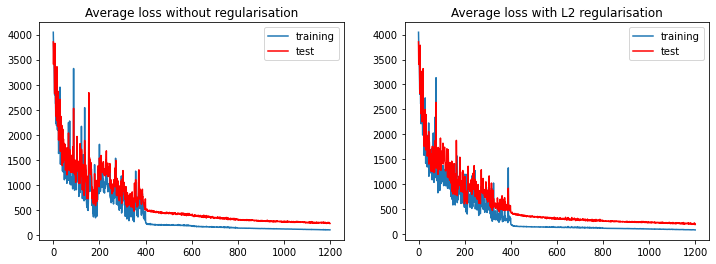

In [91]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.title('Average loss without regularisation')
plt.plot(np.arange(len(avg_loss_ms_train)), avg_loss_ms_train)
# plt.ylim(0.4, 1.2)
plt.plot(np.arange(len(avg_loss_ms_test)), avg_loss_ms_test, c='red')
plt.legend(['training', 'test'])

plt.subplot(1, 2, 2)
plt.title('Average loss with L2 regularisation')
plt.plot(np.arange(len(avg_loss_ms_train_l2)), avg_loss_ms_train_l2)
# plt.ylim(0.4, 1.2)
plt.plot(np.arange(len(avg_loss_ms_test_l2)), avg_loss_ms_test_l2, c='red')
plt.legend(['training', 'test'])

plt.show()

Brak przeuczenia.

# Zbiór `rings5-sparse`

In [34]:
r5_x_train, r5_y_train = read_classification_data('../data/classification/rings5-sparse-training.csv')
r5_x_test, r5_y_test = read_classification_data('../data/classification/rings5-sparse-test.csv')

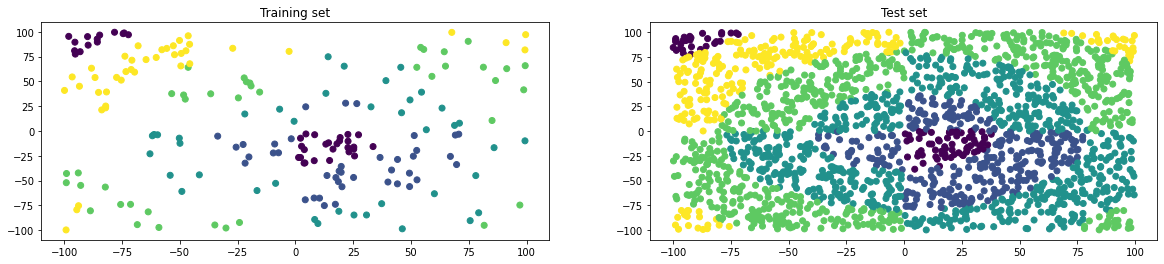

In [35]:
plt.figure(figsize=[20, 4])
plt.subplot(1, 2, 1)
plt.title('Training set')
plt.scatter(r5_x_train[:, 0], r5_x_train[:, 1], c=np.argmax(r5_y_train, axis=1))
plt.subplot(1, 2, 2)
plt.title('Test set')
plt.scatter(r5_x_test[:, 0], r5_x_test[:, 1], c=np.argmax(r5_y_test, axis=1))
plt.show()

- regularization_rate = 0

In [36]:
r5_no_reg_build = {'input_shape': r5_x_train.shape, 'neurons_num': [32, 40, 5], 'activations': [Tanh(), Tanh(), Softmax()]}
r5_no_reg_fit = [{'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0},
                 {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0}]
                 
results_train, results_test, r5_no_reg_nns = cv_network(build_args=r5_no_reg_build, fit_args=r5_no_reg_fit)

Epoch number 400/400
Loss on training set: 0.4294560353853339 f_score on training set: 0.3992635486622536, loss on test set: 0.6121220447729409 f_score on test set: 0.3070365522260282
Epoch number 400/400
Loss on training set: 0.42106892900136533 f_score on training set: 0.4154491791550932, loss on test set: 0.6052829999131265 f_score on test set: 0.3299356484306756
Epoch number 400/400
Loss on training set: 0.4821134102320069 f_score on training set: 0.3792638916031528, loss on test set: 0.5362437144786941 f_score on test set: 0.30076039383347075
Epoch number 400/400
Loss on training set: 0.46626167309383687 f_score on training set: 0.4065571602719064, loss on test set: 0.5281820437421066 f_score on test set: 0.3164505900236043
Epoch number 400/400
Loss on training set: 0.4089995559466404 f_score on training set: 0.42018154935153845, loss on test set: 0.5696993828236495 f_score on test set: 0.2950549789240926
Epoch number 400/400
Loss on training set: 0.3959277814747328 f_score on tra

In [37]:
df_results.loc['rings5-sparse-no-reg'] = ['f_score', np.mean(results_train), np.mean(results_test)]

- regularization_rate = 0.1

In [38]:
r5_l2_build = {'input_shape': r5_x_train.shape, 'neurons_num': [32, 40, 5], 'activations': [Tanh(), Tanh(), Softmax()]}
r5_l2_fit = [{'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0.1},
                 {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0.1}]
results_train, results_test, r5_l2_nns = cv_network(build_args=r5_l2_build, fit_args=r5_l2_fit)

Epoch number 400/400
Loss on training set: 0.42617532433196387 f_score on training set: 0.40693993821302404, loss on test set: 0.5744138013212947 f_score on test set: 0.31195399419338243
Epoch number 400/400
Loss on training set: 0.4167990491528161 f_score on training set: 0.4145020502710686, loss on test set: 0.5592685621799491 f_score on test set: 0.33162474859326346
Epoch number 400/400
Loss on training set: 0.47920349510245014 f_score on training set: 0.3533846104185789, loss on test set: 0.5221307081037395 f_score on test set: 0.29909887666643714
Epoch number 400/400
Loss on training set: 0.4641194280716736 f_score on training set: 0.4216680118094861, loss on test set: 0.5123466992255812 f_score on test set: 0.2983709846643425
Epoch number 400/400
Loss on training set: 0.40946561379254637 f_score on training set: 0.43311050634642934, loss on test set: 0.5579694953545212 f_score on test set: 0.2952876323985413
Epoch number 400/400
Loss on training set: 0.39774875122047476 f_score o

In [39]:
df_results.loc['rings5-sparse-l2-0.1'] = ['f_score', np.mean(results_train), np.mean(results_test)]

In [40]:
df_results

,metric,mean metric train,mean metric test
multimodal-sparse-no-reg,mse,99.827135,225.507490
multimodal-sparse-l2-0.01,mse,86.420571,195.392992
rings5-sparse-no-reg,mse,0.447151,0.311712
rings5-sparse-l2-0.1,mse,0.447817,0.312089


Dla zbioru `rings5-sparse` regularyzacja z parametrem 0.1 nieznacznie pogorszyła wynik MSE.

In [41]:
def average_loss(nns):
    n = len(nns) - 1
    sum_loss_train = np.array(nns[1].history['loss_train'])
    sum_loss_test = np.array(nns[1].history['loss_test'])
    for i in range(2, len(nns)):
        sum_loss_train = np.add(sum_loss_train, np.array(nns[i].history['loss_train']))
        sum_loss_test = np.add(sum_loss_test, np.array(nns[i].history['loss_test']))
    return sum_loss_train / n, sum_loss_test / n

In [42]:
avg_loss_r5_train_l2, avg_loss_r5_test_l2 = average_loss(r5_l2_nns)
avg_loss_r5_train, avg_loss_r5_test = average_loss(r5_no_reg_nns)

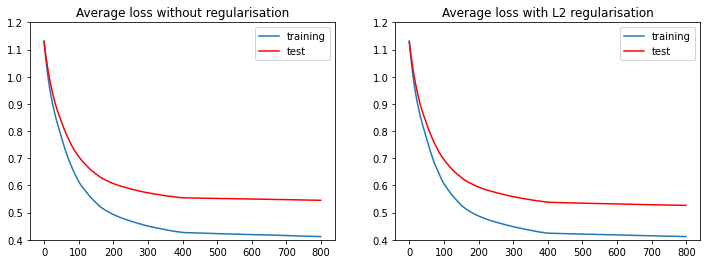

In [69]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.title('Average loss without regularisation')
plt.plot(np.arange(len(avg_loss_r5_train)), avg_loss_r5_train)
plt.ylim(0.4, 1.2)
plt.plot(np.arange(len(avg_loss_r5_test)), avg_loss_r5_test, c='red')
plt.legend(['training', 'test'])

plt.subplot(1, 2, 2)
plt.title('Average loss with L2 regularisation')
plt.plot(np.arange(len(avg_loss_r5_train_l2)), avg_loss_r5_train_l2)
plt.ylim(0.4, 1.2)
plt.plot(np.arange(len(avg_loss_r5_test_l2)), avg_loss_r5_test_l2, c='red')
plt.legend(['training', 'test'])

plt.show()

Brak przeuczenia.

Nie widać różnicy.

Sprawdźmy dla
- regularisation_rate = 3

In [70]:
r5_l2_build = {'input_shape': r5_x_train.shape, 'neurons_num': [32, 40, 5], 'activations': [Tanh(), Tanh(), Softmax()]}
r5_l2_fit = [{'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 3},
                 {'x_train': r5_x_train, 'y_train': r5_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00001, 'x_test': r5_x_test, 'y_test': r5_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 3}]
results_train, results_test, r5_l2_nns2 = cv_network(build_args=r5_l2_build, fit_args=r5_l2_fit)

Epoch number 400/400
Loss on training set: 0.5003082297552266 f_score on training set: 0.15986895986895988, loss on test set: 0.49081317992141793 f_score on test set: 0.19574624764428608
Epoch number 400/400
Loss on training set: 0.5043538572826258 f_score on training set: 0.06666666666666668, loss on test set: 0.49457807883781396 f_score on test set: 0.00448688602765856
Epoch number 400/400
Loss on training set: 0.49641654920072587 f_score on training set: 0.06666666666666668, loss on test set: 0.48342078192138 f_score on test set: 0.024510295434198748
Epoch number 400/400
Loss on training set: 0.5010436962698585 f_score on training set: 0.06666666666666668, loss on test set: 0.4900194098368179 f_score on test set: 0.024510295434198748
Epoch number 400/400
Loss on training set: 0.5036731351101326 f_score on training set: 0.1586994604442576, loss on test set: 0.5353680903329682 f_score on test set: 0.08252878748027355
Epoch number 400/400
Loss on training set: 0.5065090788838724 f_scor

In [71]:
df_results.loc['rings5-sparse-l2-3'] = ['f_score', np.mean(results_train), np.mean(results_test)]

In [72]:
df_results

,metric,mean metric train,mean metric test
multimodal-sparse-no-reg,mse,99.827135,225.507490
multimodal-sparse-l2-0.01,mse,86.420571,195.392992
rings5-sparse-no-reg,mse,0.447151,0.311712
rings5-sparse-l2-0.1,mse,0.447817,0.312089
rings3-balanse-no-reg,mse,0.817360,0.408309
rings3-balanse-l2-2,mse,0.317279,0.136900
xor3-balance-no-reg,mse,0.934801,0.405436
xor3-balance-l2-0.01,mse,0.933491,0.400492
xor3-balanse-l2-3,mse,0.929152,0.393245
xor3-balanse-l2-5,mse,0.929152,0.393245


Zmiana parametru jeszcze bardziej pogorszyła wynik (f_score).

# Zbiór `rings3-balance`

In [44]:
r3_x_train, r3_y_train = read_classification_data('../data/classification/rings3-balance-training.csv')
r3_x_test, r3_y_test = read_classification_data('../data/classification/rings3-balance-test.csv')

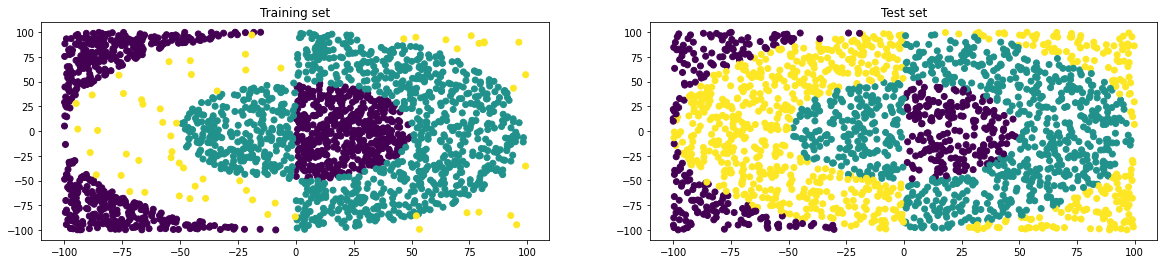

In [45]:
plt.figure(figsize=[20, 4])
plt.subplot(1, 2, 1)
plt.title('Training set')
plt.scatter(r3_x_train[:, 0], r3_x_train[:, 1], c=np.argmax(r3_y_train, axis=1))
plt.subplot(1, 2, 2)
plt.title('Test set')
plt.scatter(r3_x_test[:, 0], r3_x_test[:, 1], c=np.argmax(r3_y_test, axis=1))
plt.show()

- regularization_rate = 0

In [46]:
r3_no_reg_build = {'input_shape': r3_x_train.shape, 'neurons_num': [32, 40, 3], 'activations': [Tanh(), Tanh(), Softmax()]}
r3_no_reg_fit = [{'x_train': r3_x_train, 'y_train': r3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': r3_x_test, 'y_test': r3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0},
                 {'x_train': r3_x_train, 'y_train': r3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00001, 'x_test': r3_x_test, 'y_test': r3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0}]
                 
results_train, results_test, r3_no_reg_nns = cv_network(build_args=r3_no_reg_build, fit_args=r3_no_reg_fit)

Epoch number 400/400
Loss on training set: 0.21248568604094906 f_score on training set: 0.8919395774953531, loss on test set: 0.755193995734195 f_score on test set: 0.4423445180279625
Epoch number 400/400
Loss on training set: 0.18570118860692 f_score on training set: 0.9110671933028526, loss on test set: 0.7535004846439759 f_score on test set: 0.45502024177845474
Epoch number 400/400
Loss on training set: 0.40924731851346224 f_score on training set: 0.6977259998866027, loss on test set: 0.8080821341064944 f_score on test set: 0.35036454117994004
Epoch number 400/400
Loss on training set: 0.3830768964388726 f_score on training set: 0.7274124523545453, loss on test set: 0.8073280948063678 f_score on test set: 0.3703338873222005
Epoch number 400/400
Loss on training set: 0.2727378514825875 f_score on training set: 0.8333206806961623, loss on test set: 0.782119891712185 f_score on test set: 0.41193339390219214
Epoch number 400/400
Loss on training set: 0.22447545682612302 f_score on train

In [47]:
df_results.loc['rings3-balance-no-reg'] = ['f_score', np.mean(results_train), np.mean(results_test)]

- regularization_rate = 2

In [48]:
r3_l2_build = {'input_shape': r3_x_train.shape, 'neurons_num': [32, 40, 3], 'activations': [Tanh(), Tanh(), Softmax()]}
r3_l2_fit = [{'x_train': r3_x_train, 'y_train': r3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': r3_x_test, 'y_test': r3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 2},
                 {'x_train': r3_x_train, 'y_train': r3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00001, 'x_test': r3_x_test, 'y_test': r3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 2}]
                 
results_train, results_test, r3_l2_nns = cv_network(build_args=r3_l2_build, fit_args=r3_l2_fit)

Epoch number 400/400
Loss on training set: 0.5149296665723894 f_score on training set: 0.317279015165937, loss on test set: 0.7810410723788841 f_score on test set: 0.07480461665292662
Epoch number 400/400
Loss on training set: 0.5131633613047519 f_score on training set: 0.317279015165937, loss on test set: 0.7917895737461785 f_score on test set: 0.07480461665292662
Epoch number 400/400
Loss on training set: 0.5125673241807173 f_score on training set: 0.317279015165937, loss on test set: 0.7973366129364509 f_score on test set: 0.07480461665292662
Epoch number 400/400
Loss on training set: 0.5112286044970594 f_score on training set: 0.317279015165937, loss on test set: 0.8070409308018989 f_score on test set: 0.07480461665292662
Epoch number 400/400
Loss on training set: 0.5168966771369732 f_score on training set: 0.317279015165937, loss on test set: 0.771760801818123 f_score on test set: 0.07480461665292662
Epoch number 400/400
Loss on training set: 0.5146529138272713 f_score on training

In [49]:
df_results.loc['rings3-balance-l2-2'] = ['f_score', np.mean(results_train), np.mean(results_test)]

In [50]:
df_results

,metric,mean metric train,mean metric test
multimodal-sparse-no-reg,mse,99.827135,225.507490
multimodal-sparse-l2-0.01,mse,86.420571,195.392992
rings5-sparse-no-reg,mse,0.447151,0.311712
rings5-sparse-l2-0.1,mse,0.447817,0.312089
rings3-balanse-no-reg,mse,0.817360,0.408309
rings3-balanse-l2-2,mse,0.317279,0.136900


In [51]:
avg_loss_r3_train_l2, avg_loss_r3_test_l2 = average_loss(r3_l2_nns)
avg_loss_r3_train, avg_loss_r3_test = average_loss(r3_no_reg_nns)

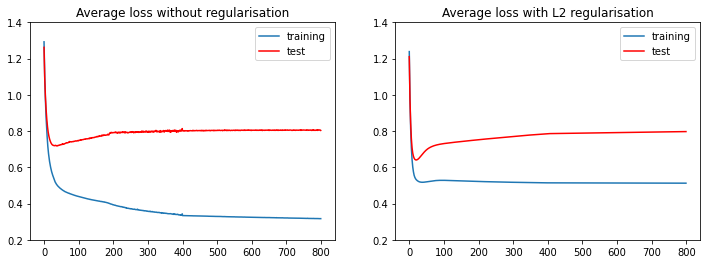

In [75]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.title('Average loss without regularisation')
plt.plot(np.arange(len(avg_loss_r3_train)), avg_loss_r3_train)
plt.ylim(0.2, 1.4)
plt.plot(np.arange(len(avg_loss_r3_test)), avg_loss_r3_test, c='red')
plt.legend(['training', 'test'])

plt.subplot(1, 2, 2)
plt.title('Average loss with L2 regularisation')
plt.plot(np.arange(len(avg_loss_r3_train_l2)), avg_loss_r3_train_l2)
plt.ylim(0.2, 1.4)
plt.plot(np.arange(len(avg_loss_r3_test_l2)), avg_loss_r3_test_l2, c='red')
plt.legend(['training', 'test'])

plt.show()

W obu przypadkach funkcja straty na zbiorze testowym rośnie. Bez regularyzacji spadek tejże funkcji na zbiorze testowym jest większy, ale i różnica między funkcjami na zbiorze testowym a treningowym jest większa.

Przeuczenie?

# Zbiór `xor3-balance`

In [53]:
x3_x_train, x3_y_train = read_classification_data('../data/classification/xor3-balance-training.csv')
x3_x_test, x3_y_test = read_classification_data('../data/classification/xor3-balance-test.csv')

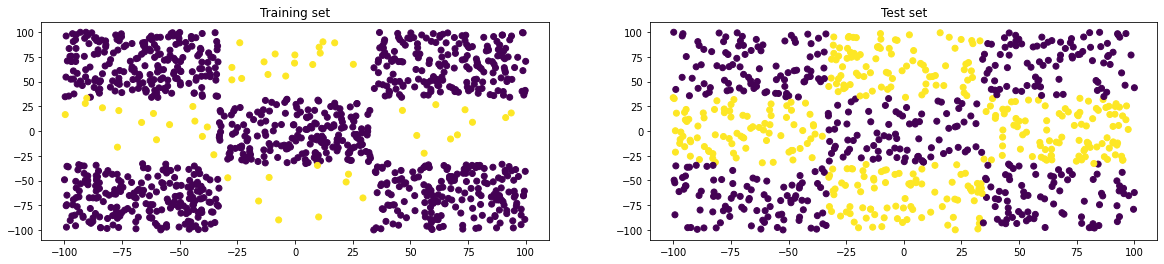

In [54]:
plt.figure(figsize=[20, 4])
plt.subplot(1, 2, 1)
plt.title('Training set')
plt.scatter(x3_x_train[:, 0], x3_x_train[:, 1], c=np.argmax(x3_y_train, axis=1))
plt.subplot(1, 2, 2)
plt.title('Test set')
plt.scatter(x3_x_test[:, 0], x3_x_test[:, 1], c=np.argmax(x3_y_test, axis=1))
plt.show()

- regularization_rate = 0

In [55]:
x3_no_reg_build = {'input_shape': x3_x_train.shape, 'neurons_num': [32, 2], 'activations': [Tanh(), Softmax()]}
x3_no_reg_fit = [{'x_train': x3_x_train, 'y_train': x3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': x3_x_test, 'y_test': x3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0},
                 {'x_train': x3_x_train, 'y_train': x3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00001, 'x_test': x3_x_test, 'y_test': x3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0}]
                 
results_train, results_test, x3_no_reg_nns = cv_network(build_args=x3_no_reg_build, fit_args=x3_no_reg_fit)

Epoch number 400/400
Loss on training set: 0.2129541274138808 f_score on training set: 0.9459286027896923, loss on test set: 1.03911452013322 f_score on test set: 0.44446014822012225
Epoch number 400/400
Loss on training set: 0.19662800836306474 f_score on training set: 0.9359047118676949, loss on test set: 1.0935043439695777 f_score on test set: 0.42075734048560137
Epoch number 400/400
Loss on training set: 0.2201438248510459 f_score on training set: 0.9382041174739342, loss on test set: 0.9979824315183068 f_score on test set: 0.4099064689355951
Epoch number 400/400
Loss on training set: 0.20495633940494654 f_score on training set: 0.9394511229149193, loss on test set: 1.0504640407167463 f_score on test set: 0.4099064689355951
Epoch number 400/400
Loss on training set: 0.1897588860134613 f_score on training set: 0.9380233466254971, loss on test set: 1.160816505740618 f_score on test set: 0.42343894953977973
Epoch number 400/400
Loss on training set: 0.18254845463379032 f_score on trai

In [56]:
df_results.loc['xor3-balance-no-reg'] = ['f_score', np.mean(results_train), np.mean(results_test)]

- regularization_rate = 0.01

In [57]:
x3_l2_build = {'input_shape': x3_x_train.shape, 'neurons_num': [32, 2], 'activations': [Tanh(), Softmax()]}
x3_l2_fit = [{'x_train': x3_x_train, 'y_train': x3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': x3_x_test, 'y_test': x3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0.01},
                 {'x_train': x3_x_train, 'y_train': x3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00001, 'x_test': x3_x_test, 'y_test': x3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0.01}]
                 
results_train, results_test, x3_l2_nns = cv_network(build_args=x3_l2_build, fit_args=x3_l2_fit)

Epoch number 400/400
Loss on training set: 0.2127924664148975 f_score on training set: 0.9380233466254971, loss on test set: 1.032287680983832 f_score on test set: 0.4418735224586288
Epoch number 400/400
Loss on training set: 0.19443480334008237 f_score on training set: 0.931473028450033, loss on test set: 1.0869738658339911 f_score on test set: 0.4044048500968413
Epoch number 400/400
Loss on training set: 0.22028251038986127 f_score on training set: 0.9388252815101877, loss on test set: 0.994767356526799 f_score on test set: 0.4099064689355951
Epoch number 400/400
Loss on training set: 0.2051567750003339 f_score on training set: 0.9394511229149193, loss on test set: 1.0471537469940375 f_score on test set: 0.4099064689355951
Epoch number 400/400
Loss on training set: 0.1896639418273004 f_score on training set: 0.9380233466254971, loss on test set: 1.157962596002936 f_score on test set: 0.4099064689355951
Epoch number 400/400
Loss on training set: 0.18281692898483543 f_score on training

In [58]:
df_results.loc['xor3-balance-l2-0.01'] = ['f_score', np.mean(results_train), np.mean(results_test)]

- regularization_rate = 3

In [59]:
x3_l2_build = {'input_shape': x3_x_train.shape, 'neurons_num': [32, 2], 'activations': [Tanh(), Softmax()]}
x3_l2_fit = [{'x_train': x3_x_train, 'y_train': x3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': x3_x_test, 'y_test': x3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 3},
                 {'x_train': x3_x_train, 'y_train': x3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00001, 'x_test': x3_x_test, 'y_test': x3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 3}]
                 
results_train, results_test, x3_l2_nns2 = cv_network(build_args=x3_l2_build, fit_args=x3_l2_fit)

Epoch number 400/400
Loss on training set: 0.2343959978985507 f_score on training set: 0.9291521486643438, loss on test set: 0.9719304161113064 f_score on test set: 0.39324476650563606
Epoch number 400/400
Loss on training set: 0.22539251526764925 f_score on training set: 0.9291521486643438, loss on test set: 1.0065106742577032 f_score on test set: 0.39324476650563606
Epoch number 400/400
Loss on training set: 0.2288296317700546 f_score on training set: 0.9291521486643438, loss on test set: 0.9925772027174069 f_score on test set: 0.39324476650563606
Epoch number 400/400
Loss on training set: 0.22113533373218835 f_score on training set: 0.9291521486643438, loss on test set: 1.0255016689582925 f_score on test set: 0.39324476650563606
Epoch number 400/400
Loss on training set: 0.20997761002537477 f_score on training set: 0.9291521486643438, loss on test set: 1.0872883260118633 f_score on test set: 0.39324476650563606
Epoch number 400/400
Loss on training set: 0.2063071028786725 f_score on

In [60]:
df_results.loc['xor3-balance-l2-3'] = ['f_score', np.mean(results_train), np.mean(results_test)]

- regularization_rate = 5

In [61]:
x3_l2_build = {'input_shape': x3_x_train.shape, 'neurons_num': [32, 2], 'activations': [Tanh(), Softmax()]}
x3_l2_fit = [{'x_train': x3_x_train, 'y_train': x3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': x3_x_test, 'y_test': x3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 5},
                 {'x_train': x3_x_train, 'y_train': x3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00001, 'x_test': x3_x_test, 'y_test': x3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 5}]
                 
results_train, results_test, x3_l2_nns3 = cv_network(build_args=x3_l2_build, fit_args=x3_l2_fit)

Epoch number 400/400
Loss on training set: 0.2401118229082598 f_score on training set: 0.9291521486643438, loss on test set: 0.9533603939494742 f_score on test set: 0.39324476650563606
Epoch number 400/400
Loss on training set: 0.22821800306745343 f_score on training set: 0.9291521486643438, loss on test set: 0.9954753095837776 f_score on test set: 0.39324476650563606
Epoch number 400/400
Loss on training set: 0.2356254885678521 f_score on training set: 0.9291521486643438, loss on test set: 0.9681596428339367 f_score on test set: 0.39324476650563606
Epoch number 400/400
Loss on training set: 0.22500458582187122 f_score on training set: 0.9291521486643438, loss on test set: 1.0087725704014776 f_score on test set: 0.39324476650563606
Epoch number 400/400
Loss on training set: 0.21265402340406103 f_score on training set: 0.9291521486643438, loss on test set: 1.0712210415942567 f_score on test set: 0.39324476650563606
Epoch number 400/400
Loss on training set: 0.20793792658245666 f_score o

In [62]:
df_results.loc['xor3-balance-l2-5'] = ['f_score', np.mean(results_train), np.mean(results_test)]

- regularization_rate = 0.01
- głębsza architektura

In [63]:
x3_l2_build = {'input_shape': x3_x_train.shape, 'neurons_num': [40, 40, 2], 'activations': [Tanh(), Tanh(), Softmax()]}
x3_l2_fit = [{'x_train': x3_x_train, 'y_train': x3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00005, 'x_test': x3_x_test, 'y_test': x3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0.01},
                 {'x_train': x3_x_train, 'y_train': x3_y_train, 'batch_size': 4, 'n_epochs': k, 'learning_rate': 0.00001, 'x_test': x3_x_test, 'y_test': x3_y_test, 'loss': cross_entropy, 'metric': f_score, 'verbose_step': k, 'regularization_rate': 0.01}]
                 
results_train, results_test, x3_l2_nns4 = cv_network(build_args=x3_l2_build, fit_args=x3_l2_fit)

Epoch number 400/400
Loss on training set: 0.11087655219021234 f_score on training set: 0.9600973675137733, loss on test set: 0.9315743196923643 f_score on test set: 0.5258207005236134
Epoch number 400/400
Loss on training set: 0.10759943661149922 f_score on training set: 0.9600973675137733, loss on test set: 0.9406986865515878 f_score on test set: 0.534639579742098
Epoch number 400/400
Loss on training set: 0.11917800871033289 f_score on training set: 0.9540229885057472, loss on test set: 1.1839872653328227 f_score on test set: 0.47882848417732143
Epoch number 400/400
Loss on training set: 0.11602791614016661 f_score on training set: 0.9532411389752753, loss on test set: 1.2158328826520906 f_score on test set: 0.47882848417732143
Epoch number 400/400
Loss on training set: 0.12745400207066113 f_score on training set: 0.9433537743511062, loss on test set: 1.201319869219916 f_score on test set: 0.46971351487226015
Epoch number 400/400
Loss on training set: 0.12153229860361137 f_score on 

In [64]:
df_results.loc['xor3-balance-l2-0.01-2'] = ['f_score', np.mean(results_train), np.mean(results_test)]

In [85]:
df_results

,metric,mean metric train,mean metric test
multimodal-sparse-no-reg,mse,99.827135,225.507490
multimodal-sparse-l2-0.01,mse,86.420571,195.392992
rings5-sparse-no-reg,f_score,0.447151,0.311712
rings5-sparse-l2-0.1,f_score,0.447817,0.312089
rings3-balanse-no-reg,f_score,0.817360,0.408309
rings3-balanse-l2-2,f_score,0.317279,0.136900
xor3-balance-no-reg,f_score,0.934801,0.405436
xor3-balance-l2-0.01,f_score,0.933491,0.400492
xor3-balanse-l2-3,f_score,0.929152,0.393245
xor3-balanse-l2-5,f_score,0.929152,0.393245


Dla zadania regresji po regularyzacji sieć osiąga niższy błąd MSE zarówno na zbiorze treningowym, jak i testowym. Dla zadania klasyfikacji wzrost f_score zależy od doboru parametru regularyzacji i nie zawsze udaje się go osiągnąć.

In [66]:
avg_loss_x3_train_l2, avg_loss_x3_test_l2 = average_loss(x3_l2_nns)
avg_loss_x3_train, avg_loss_x3_test = average_loss(x3_no_reg_nns)

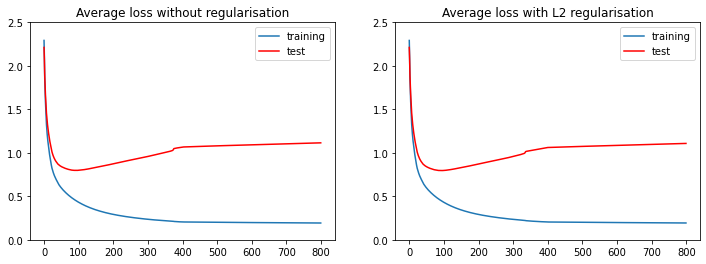

In [67]:
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.title('Average loss without regularisation')
plt.plot(np.arange(len(avg_loss_x3_train)), avg_loss_x3_train)
plt.ylim(0, 2.5)
plt.plot(np.arange(len(avg_loss_x3_test)), avg_loss_x3_test, c='red')
plt.legend(['training', 'test'])

plt.subplot(1, 2, 2)
plt.title('Average loss with L2 regularisation')
plt.plot(np.arange(len(avg_loss_x3_train_l2)), avg_loss_x3_train_l2)
plt.ylim(0, 2.5)
plt.plot(np.arange(len(avg_loss_x3_test_l2)), avg_loss_x3_test_l2, c='red')
plt.legend(['training', 'test'])

plt.show()

Przeuczenie?